In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [3]:
import pandas_datareader.data as web
start = '2010-01-01'
end = '2019-12-31'

df = web.DataReader('AAPL', 'stooq', start, end)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-12-31,71.0084,71.9246,70.9077,71.9176,1.030855e+08
2019-12-30,70.8938,71.6864,69.8549,71.3983,1.472306e+08
2019-12-27,71.3015,71.9974,70.5647,70.9755,1.494081e+08
2019-12-26,69.7592,71.0214,69.7303,71.0034,9.527219e+07
2019-12-24,69.7273,69.7762,69.2907,69.6226,4.948450e+07


In [4]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-08,6.40586,6.45421,6.36458,6.45401,5.246856e+08
2010-01-07,6.44444,6.45421,6.36409,6.41085,5.588893e+08
2010-01-06,6.52639,6.55241,6.41553,6.42221,6.452991e+08
2010-01-05,6.53905,6.56358,6.49230,6.52639,7.055130e+08
2010-01-04,6.49958,6.53008,6.46597,6.51522,5.764890e+08


In [5]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Volume
0,2019-12-31,71.0084,71.9246,70.9077,71.9176,1.030855e+08
1,2019-12-30,70.8938,71.6864,69.8549,71.3983,1.472306e+08
2,2019-12-27,71.3015,71.9974,70.5647,70.9755,1.494081e+08
3,2019-12-26,69.7592,71.0214,69.7303,71.0034,9.527219e+07
4,2019-12-24,69.7273,69.7762,69.2907,69.6226,4.948450e+07


Dropping date and Adj Close column

In [6]:
df = df.drop(['Date'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,71.0084,71.9246,70.9077,71.9176,1.030855e+08
1,70.8938,71.6864,69.8549,71.3983,1.472306e+08
2,71.3015,71.9974,70.5647,70.9755,1.494081e+08
3,69.7592,71.0214,69.7303,71.0034,9.527219e+07
4,69.7273,69.7762,69.2907,69.6226,4.948450e+07


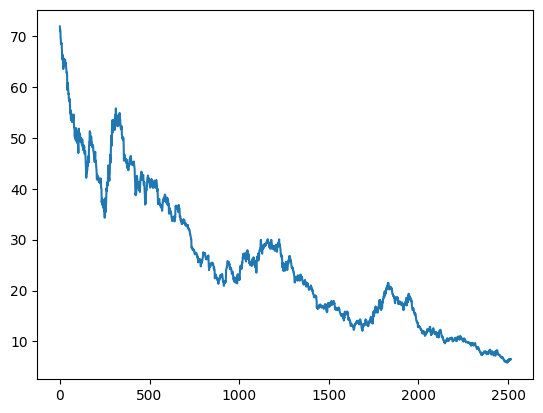

In [7]:
plt.plot(df.Close)

In [8]:
df

,Open,High,Low,Close,Volume
0,71.00840,71.92460,70.90770,71.91760,1.030855e+08
1,70.89380,71.68640,69.85490,71.39830,1.472306e+08
2,71.30150,71.99740,70.56470,70.97550,1.494081e+08
3,69.75920,71.02140,69.73030,71.00340,9.527219e+07
4,69.72730,69.77620,69.29070,69.62260,4.948450e+07
...,...,...,...,...,...
2511,6.40586,6.45421,6.36458,6.45401,5.246856e+08
2512,6.44444,6.45421,6.36409,6.41085,5.588893e+08
2513,6.52639,6.55241,6.41553,6.42221,6.452991e+08
2514,6.53905,6.56358,6.49230,6.52639,7.055130e+08


In [9]:
# ma100 is created for finding the mean of the 100 values and displaying them.
# for that rolling() function is used.

ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2511    6.953343
2512    6.937091
2513    6.921914
2514    6.908978
2515    6.897006
Name: Close, Length: 2516, dtype: float64

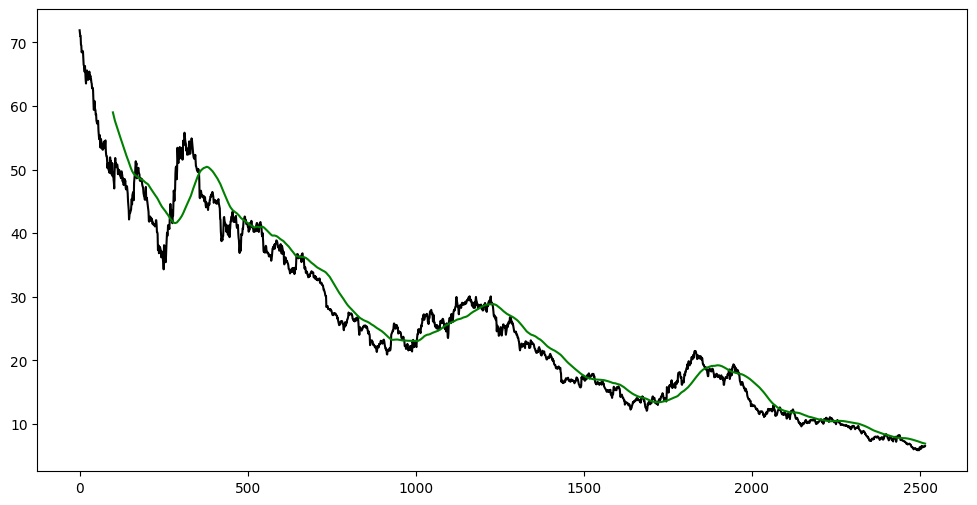

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))

plt.plot(df.Close,'black')
plt.plot(ma100,'g') # this is the mean of 100 values 

In [11]:
ma200 = df.Close.rolling(200).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2511    7.532251
2512    7.517503
2513    7.502498
2514    7.487859
2515    7.473319
Name: Close, Length: 2516, dtype: float64

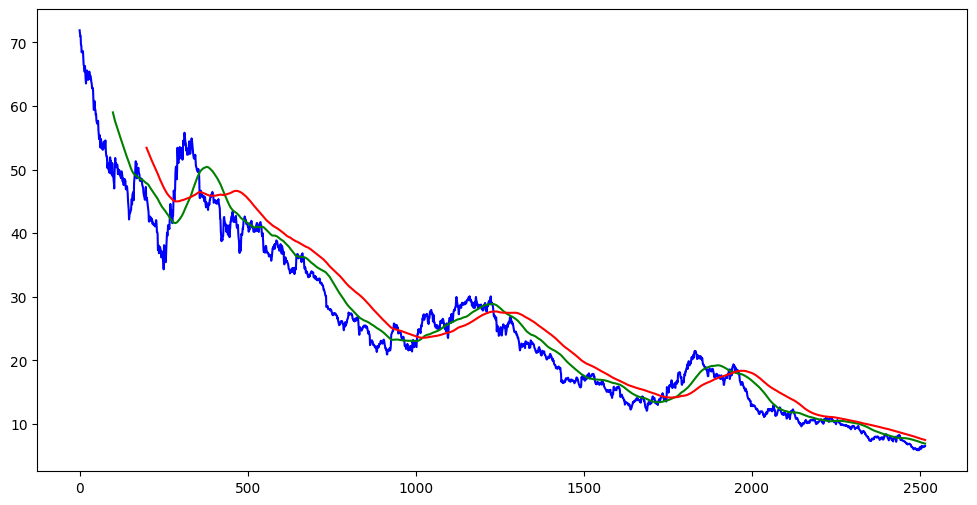

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

ma100 = df.Close.rolling(100).mean()
ma100

plt.plot(df.Close, 'b')
plt.plot(ma100, 'g')  # this is the mean of 100 values
plt.plot(ma200, 'r') # this is the mean of 200 values 

In [13]:
df.shape

(2516, 5)

In [16]:
# splitting the data into training and testing
import pandas as pd
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print("Used data for training: ", data_training.shape)
print("Used data for testing: ", data_testing.shape)

Used data for training:  (1761, 1)
Used data for testing:  (755, 1)


In [17]:
data_training.head()

,Close
0,71.9176
1,71.3983
2,70.9755
3,71.0034
4,69.6226


In [18]:
data_testing.head()

,Close
1761,16.8635
1762,16.3442
1763,15.6512
1764,15.8198
1765,15.7560


For LSTM , we need to scale the data into the range of [-1,1] and **Scaling is required.**

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[1.        ],
       [0.9913238 ],
       [0.98425987],
       ...,
       [0.06725934],
       [0.06889166],
       [0.07662054]])

- - The above **data_training_array** needs to be divided into following **x_train** and **y_train** variable.

In [20]:
import numpy as np

# The data is dependant on the previous result. (ma100) and (ma200)
# So, to calculate the next day value we train the following array.
# 100 days are x_train and 101 day is y_train and it goes on changing.

x_train = []
y_train = []


for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])


x_train

# Now, converting x_train into numpy value, so that it can be provided to LSTM.
x_train, y_train = np.array(x_train), np.array(y_train)

# ML Model

In [31]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [32]:

model = Sequential()
model.add(LSTM(units=50,
               activation='relu',
               return_sequences=True,
               input_shape=(x_train.shape[1], 1)
               )
          )
model.add(Dropout(0.2))


# Second Layer
model.add(LSTM(units=60,
               activation='relu',
               return_sequences=True,
               )
          )
model.add(Dropout(0.3))

# Third Layer
model.add(LSTM(units=80,
               activation='relu',
               return_sequences=True,
               )
          )
model.add(Dropout(0.4))

# Fourth Layer
model.add(LSTM(units=120,
               activation='relu',
               )
          )
model.add(Dropout(0.5))


# Dense Layer - to connect all the layers
model.add(Dense(units=1))

c:\Users\sinha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 119ms/step - loss: 0.0513
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 133ms/step - loss: 0.0060
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - loss: 0.0045
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - loss: 0.0037
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - loss: 0.0040
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - loss: 0.0034
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 135ms/step - loss: 0.0038
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 139ms/step - loss: 0.0025
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 145ms/step - loss: 0.0034
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 147ms/step - loss: 0.0028
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 144ms/step - loss: 0.0027
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 142ms/step - loss: 0.0025
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 148ms/step - loss: 0.0026
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 146ms/step - loss: 0.0027
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 148ms/step - l

In [35]:
model.save('keras_model.h5')

In [21]:
data_testing.head()

,Close
1761,16.8635
1762,16.3442
1763,15.6512
1764,15.8198
1765,15.7560


In [22]:
data_training.head()

,Close
0,71.9176
1,71.3983
2,70.9755
3,71.0034
4,69.6226


In [23]:
# We need previous 100 days data and we need to comapre and append the list.
import pandas as pd

past_100_days = data_training.tail(100)
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [24]:
final_df.head()

,Close
0,13.7261
1,13.8437
2,13.7481
3,13.7241
4,13.6723


In [25]:
input_data = scaler.fit_transform(final_df)
input_data

array([[5.04456778e-01],
       [5.11985572e-01],
       [5.05865226e-01],
       [5.04328737e-01],
       [5.01012482e-01],
       [5.07459333e-01],
       [4.88253224e-01],
       [4.90929275e-01],
       [4.79437620e-01],
       [5.09373542e-01],
       [5.31070043e-01],
       [5.27497706e-01],
       [5.35154542e-01],
       [5.43009841e-01],
       [5.32862613e-01],
       [5.36947112e-01],
       [5.15692351e-01],
       [5.06825531e-01],
       [4.94629652e-01],
       [5.01332584e-01],
       [4.76313426e-01],
       [4.50910145e-01],
       [4.33355762e-01],
       [4.27677156e-01],
       [4.29015181e-01],
       [4.14149653e-01],
       [3.98061335e-01],
       [4.01057488e-01],
       [4.22382671e-01],
       [4.68784631e-01],
       [4.55954950e-01],
       [4.75737243e-01],
       [4.84732104e-01],
       [4.87484979e-01],
       [4.70180275e-01],
       [4.68720611e-01],
       [4.62715501e-01],
       [4.71588723e-01],
       [4.80013803e-01],
       [4.75737243e-01],


In [26]:
input_data.shape

(855, 1)

In [27]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [28]:
x_test, y_test = np.array(x_test), np.array(y_test)

print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [36]:
# Making Predictions

y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step


In [37]:
y_predicted.shape

(755, 1)

In [38]:
y_test

array([7.05314266e-01, 6.72068492e-01, 6.27702380e-01, 6.38496213e-01,
       6.34411714e-01, 6.48579420e-01, 6.46914891e-01, 6.51511553e-01,
       6.60640857e-01, 6.75448767e-01, 6.46025008e-01, 6.28086502e-01,
       6.67215748e-01, 6.85660015e-01, 6.90320697e-01, 6.67471829e-01,
       6.74168359e-01, 7.01741930e-01, 6.85211872e-01, 7.57977417e-01,
       7.78329491e-01, 7.76677766e-01, 7.84526662e-01, 7.71953063e-01,
       7.75653440e-01, 7.84910784e-01, 7.49424297e-01, 7.30211786e-01,
       7.28675297e-01, 7.38060682e-01, 6.63316908e-01, 6.59232409e-01,
       6.81383454e-01, 6.93252830e-01, 6.93124789e-01, 7.01357808e-01,
       6.83169623e-01, 7.22939072e-01, 7.66588156e-01, 7.70032452e-01,
       7.54654761e-01, 7.93265442e-01, 7.91037533e-01, 8.07951713e-01,
       8.18803165e-01, 8.33098912e-01, 8.26267939e-01, 8.66792829e-01,
       8.19443369e-01, 8.64052758e-01, 8.87413789e-01, 8.97625037e-01,
       8.68201277e-01, 8.58310131e-01, 8.55115515e-01, 8.80134673e-01,
      

In [39]:
y_predicted

array([[0.68899006],
       [0.6962427 ],
       [0.7026529 ],
       [0.7064502 ],
       [0.706908  ],
       [0.70403665],
       [0.6986555 ],
       [0.69170547],
       [0.68417084],
       [0.67704946],
       [0.6713537 ],
       [0.66698974],
       [0.663257  ],
       [0.66048145],
       [0.65942854],
       [0.66065395],
       [0.6636449 ],
       [0.6677971 ],
       [0.6731681 ],
       [0.67923456],
       [0.68714136],
       [0.6979478 ],
       [0.711666  ],
       [0.7276282 ],
       [0.7442804 ],
       [0.760122  ],
       [0.7741744 ],
       [0.7848973 ],
       [0.7911871 ],
       [0.7928641 ],
       [0.79063284],
       [0.7839987 ],
       [0.77310807],
       [0.7590726 ],
       [0.74342656],
       [0.72760516],
       [0.7130308 ],
       [0.7003683 ],
       [0.6907685 ],
       [0.6857912 ],
       [0.6863441 ],
       [0.69197464],
       [0.7023631 ],
       [0.7164653 ],
       [0.733191  ],
       [0.75141394],
       [0.77018404],
       [0.788

In [40]:
scaler.scale_

array([0.06402036])

In [41]:
scale_factor = 1/0.06402036
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

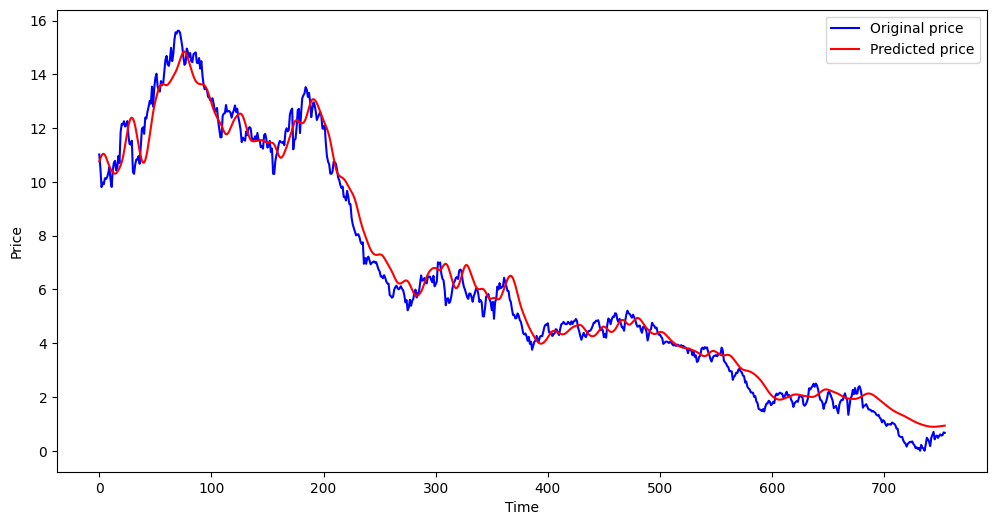

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label="Original price")
plt.plot(y_predicted, 'r', label="Predicted price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()